<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/SeaquantialModel%20NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Exercise #0602

### 1. Linear regression:

In [ ]:
# Install the seaborn package to draw the scatterplot matrix. 
!pip install -q seaborn

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


#### 1.1. Data:

In [ ]:
# Estimate the automobile fuel efficiency. 
# Using the Auto MPG data set, create the estimation model of automobile fuel efficiency in the late 1970s and the early 1980s. 
# Use tf.keras API. For more details, refer to the Keras guide. 

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


#### 1.2. Data Cleansing

In [ ]:
# Please note that some data are missing in this dataset. 

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# Missing line deleted

In [ ]:
dataset = dataset.dropna()

In [ ]:
# Since the "Origin" raw belongs to categorical data not numerical data, convert to one-hot encoding. 

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


#### 1.3.Divide data into the training set and the test set.

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
print(train_dataset.shape)
print(test_dataset.shape)

(314, 10)
(78, 10)


#### 1.4.Examine the data

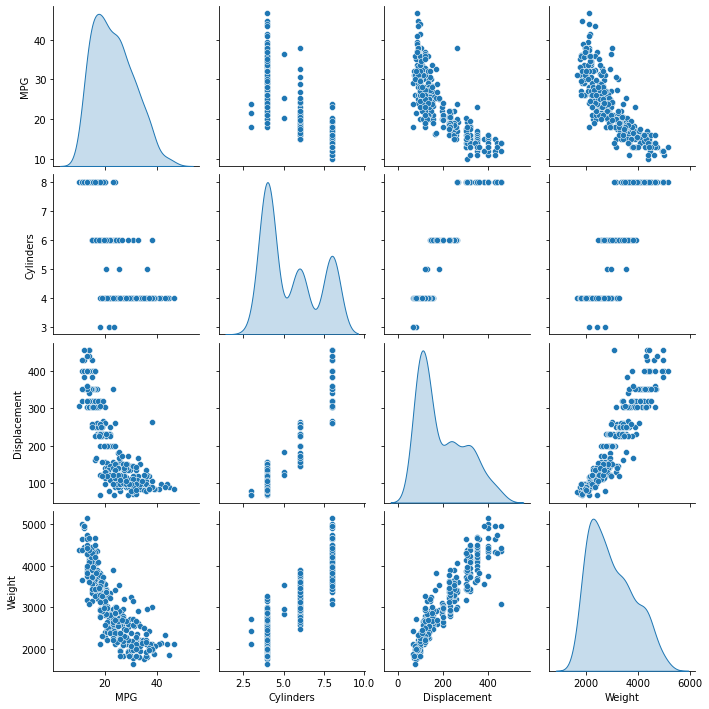

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

#### 1.5.Check the statistics

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


#### 1.6.Split target values, or "labels", in feature

In [ ]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


#### 1.7.Normalize data

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#### 1.8.Create the model

In [ ]:
# Make the sequential model with densely connected layer. The output layer returns the consecutive values.  

In [ ]:
len(train_dataset.keys())

9

In [ ]:
def build_model():
    model = keras.Sequential([layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1, activation='linear')])
    optimizer = tf.keras.optimizers.SGD(0.0001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])
    return model

model = build_model()

#### 1.9.Check the model

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                640       
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 64)                4160      
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,025
Trainable params: 9,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Call the medel.predict mothod by arraying 10 samples of the train set into one batch.

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.06841837],
       [-0.01547462],
       [ 0.3882212 ],
       [ 0.07071737],
       [ 0.10949414],
       [-0.03191379],
       [ 0.07048041],
       [ 0.11730431],
       [ 0.05497625],
       [-0.02719889]], dtype=float32)

#### 1.10.Train the model

In [ ]:


EPOCHS = 1000

history = model.fit(normed_train_data, train_labels,epochs=EPOCHS, validation_split = 0.2, batch_size=70)

Epoch 1/1000
4/4 [==============================] - 1s 52ms/step - loss: 601.5663 - mse: 601.5663 - val_loss: 623.1442 - val_mse: 623.1442
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 594.1014 - mse: 594.1014 - val_loss: 615.2325 - val_mse: 615.2325
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 586.8716 - mse: 586.8716 - val_loss: 607.3946 - val_mse: 607.3946
Epoch 4/1000
4/4 [==============================] - 0s 17ms/step - loss: 579.6928 - mse: 579.6928 - val_loss: 599.5084 - val_mse: 599.5084
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 572.4600 - mse: 572.4600 - val_loss: 591.4442 - val_mse: 591.4442
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 565.0983 - mse: 565.0983 - val_loss: 583.3647 - val_mse: 583.3647
Epoch 7/1000
4/4 [==============================] - 0s 18ms/step - loss: 557.6385 - mse: 557.6385 - val_loss: 575.1914 - val_mse: 575.1914
Epoch 8/1000
4/4 [=========

In [ ]:
# Visualize the performance of training process using the statistics in the history object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
995,6.759580,6.759580,8.249475,8.249475,995
996,6.760664,6.760664,8.250474,8.250474,996
997,6.760729,6.760729,8.249434,8.249434,997
998,6.754203,6.754203,8.248668,8.248668,998
999,6.751943,6.751943,8.251564,8.251564,999


In [ ]:
hist.head()


,loss,mse,val_loss,val_mse,epoch
0,601.566284,601.566284,623.144165,623.144165,0
1,594.101440,594.101440,615.232483,615.232483,1
2,586.871643,586.871643,607.394592,607.394592,2
3,579.692810,579.692810,599.508423,599.508423,3
4,572.460022,572.460022,591.444153,591.444153,4


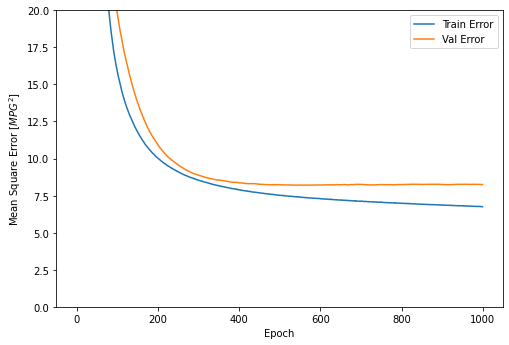

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))

    
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
# By modifying the model.fit method, let trainig automatically stop when varification does not improve.  
# Use EarlyStopping callback to check the training process at every epoch.
# Automatically stop training when there is no more improvement over the specified number of epochs.  

Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 566.3007 - mse: 566.3007 - val_loss: 550.4825 - val_mse: 550.4825
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 476.7901 - mse: 476.7901 - val_loss: 374.4702 - val_mse: 374.4702
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 224.0224 - mse: 224.0224 - val_loss: 50.3379 - val_mse: 50.3379
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 43.9015 - mse: 43.9015 - val_loss: 24.1080 - val_mse: 24.1080
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 24.6070 - mse: 24.6070 - val_loss: 17.5354 - val_mse: 17.5354
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 17.3946 - mse: 17.3946 - val_loss: 15.3647 - val_mse: 15.3647
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 14.6849 - mse: 14.6849 - val_loss: 14.9637 - val_mse: 14.9637
Epoch 8/1000
8/8 [==============================] -

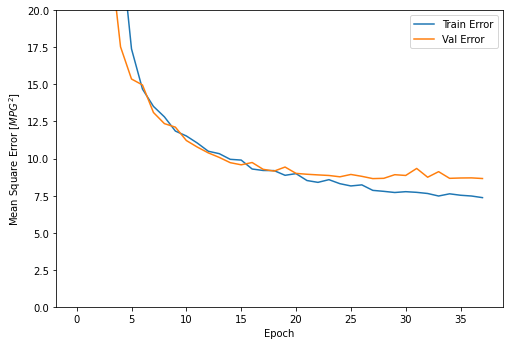

In [ ]:
model = build_model()

# The 'patience' parameter is the epoch number to be used for checkking improvement. 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, callbacks=[early_stop])

plot_history(history)

#### 1.11.Check the performance of model training set.

In [ ]:
loss, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Mean square error of test set: {:5.2f} MPG".format(mse))

3/3 - 0s - loss: 6.3495 - mse: 6.3495 - 24ms/epoch - 8ms/step
Mean square error of test set:  6.35 MPG


#### 1.12. Prediction

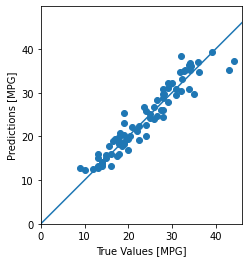

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])